# ПРОЕКТ 3. ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

##  ОГЛАВЛЕНИЕ
[**1. Базовый анализ структуры данных**](https://github.com/alekseykonotop/DS_projects/tree/main/project_3/Project_3_DS_Salary_Research.ipynb#Базовый-анализ-структуры-данных)  
[**2. Преобразование данных**](https://github.com/alekseykonotop/DS_projects/tree/main/project_3/Project_3_DS_Salary_Research.ipynb#Преобразование-данных)  
[**3. Разведывательный анализ - EDA**](https://github.com/alekseykonotop/DS_projects/tree/main/project_3/Project_3_DS_Salary_Research.ipynb#Разведывательный-анализ---EDA)  


[**4. Ответы на вопросы бизнеса**](https://github.com/alekseykonotop/DS_projects/tree/main/project_3/Project_3_DS_Salary_Research.ipynb#Ответы-на-вопросы-бизнеса)  
- [**4.1 Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?**](https://github.com/alekseykonotop/DS_projects/tree/main/project_3/Project_3_DS_Salary_Research.ipynb#4.1-Наблюдается-ли-ежегодный-рост-зарплат-у-специалистов-Data-Scientist?)  
- [**4.2 Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?**](https://github.com/alekseykonotop/DS_projects/tree/main/project_3/Project_3_DS_Salary_Research.ipynb#4.2-Как-соотносятся-зарплаты-Data-Scientist-и-Data-Engineer-в-2022-году?)  
- [**4.3 Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?**](https://github.com/alekseykonotop/DS_projects/tree/main/project_3/Project_3_DS_Salary_Research.ipynb#4.3-Как-соотносятся-зарплаты-специалистов-Data-Scientist-в-компаниях-различных-размеров?)  
- [**4.4 Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?**](https://github.com/alekseykonotop/DS_projects/tree/main/project_3/Project_3_DS_Salary_Research.ipynb#4.4-Есть-ли-связь-между-наличием-должностей-Data-Scientist-и-Data-Engineer-и-размером-компании?)
- [**4.5 Какие факторы влияют на зарплату специалиста Data Scientist?**](https://github.com/alekseykonotop/DS_projects/tree/main/project_3/Project_3_DS_Salary_Research.ipynb#4.5-Какие-факторы-влияют-на-зарплату-специалиста-Data-Scientist?)  
    - [**1. Есть ли ежегодный рост уровня заработной платы?**](https://github.com/alekseykonotop/DS_projects/tree/main/project_3/Project_3_DS_Salary_Research.ipynb#1.-Есть-ли-ежегодный-рост-уровня-заработной-платы?)
    - [**2. Влияет ли опыт работы на уровень заработной платы?**](https://github.com/alekseykonotop/DS_projects/tree/main/project_3/Project_3_DS_Salary_Research.ipynb#2.-Влияет-ли-опыт-работы-на-уровень-заработной-платы?)
     
     
[**3. Ответы на поставленные вопросы**](https://github.com/alekseykonotop/DS_projects/tree/main/project_3/Project_3_DS_Salary_Research.ipynb#Ответы-на-поставленные-вопросы)   
[**4. Итоги**](https://github.com/alekseykonotop/DS_projects/tree/main/project_3/Project_3_DS_Salary_Research.ipynb#Итоги)  



## Загрузка данных

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from pprint import pprint

# !pip install -q country_converter
import country_converter

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

DATA_PATH = 'data/ds_salaries.csv'

**ОПИСАНИЕ ПРИЗНАКОВ**
| НАИМЕНОВАНИЕ СТОЛБЦА  | ОПИСАНИЕ |
| :---          |     :---     |
| `work_year`  | Год, в котором была выплачена зарплата. |
| `experience_level`  | Опыт работы на этой должности в течение года со следующими возможными значениями:  
|    | - *`EN` — Entry-level/Junior*;
|    | - *`MI` — Mid-level/Intermediate*;
|    | - *`SE` — Senior-level/Expert*;
|    | - *`EX` — Executive-level/Director*.|
| `employment_type`  | Тип трудоустройства для этой роли:  |
|   | - *`PT` — неполный рабочий день*;  |
|   | - *`FT` — полный рабочий день;*  |
|   | - *`CT` — контракт;*  |
|   | - *`FL` — фриланс.*  |
| `job_title`  | Роль, в которой соискатель работал в течение года.  |
| `salary`  | Общая выплаченная валовая сумма заработной платы.  |
| `salary_currency`  | Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.  |
| `salary_in_usd`  | Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).  |
| `employee_residence`  | Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.  |
| `remote_ratio`  | Общий объём работы, выполняемой удалённо. Возможные значения:  |
|   | - *`0` — удалённой работы нет (менее 20 %);*  |
|   | - *`50` — частично удалённая работа;*  |
|   | - *`100` — полностью удалённая работа (более 80 %).*  |
| `company_location`  | Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.  |
| `company_size`  | Среднее количество людей, работавших в компании в течение года:  |
|   | - *`S` — менее 50 сотрудников (небольшая компания);*  |
|   | - *`M` — от 50 до 250 сотрудников (средняя компания);*  |
|   | - *`L` — более 250 сотрудников (крупная компания).*  |



## Базовый анализ структуры данных
[❎ **К ОГЛАВЛЕНИЮ**](#ОГЛАВЛЕНИЕ)

In [2]:
# чтение данных
data = pd.read_csv(DATA_PATH, index_col=0)
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


None

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Проверим данные на наличие полных дубликатов.

In [3]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

Количество дубликатов: 42


In [4]:
# Выведем основную статистическую информацию о столбцах.
display(data.describe(include='all').round())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.0,607,607,607,607.0,607,607.0,607,607.0,607,607
unique,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,2021.0,NaN,NaN,NaN,324000.0,NaN,112298.0,NaN,71.0,NaN,NaN
std,1.0,NaN,NaN,NaN,1544357.0,NaN,70957.0,NaN,41.0,NaN,NaN
min,2020.0,NaN,NaN,NaN,4000.0,NaN,2859.0,NaN,0.0,NaN,NaN
25%,2021.0,NaN,NaN,NaN,70000.0,NaN,62726.0,NaN,50.0,NaN,NaN
50%,2022.0,NaN,NaN,NaN,115000.0,NaN,101570.0,NaN,100.0,NaN,NaN
75%,2022.0,NaN,NaN,NaN,165000.0,NaN,150000.0,NaN,100.0,NaN,NaN


В датасете, 607 записей без пропусков.  
Присутствуют дубликаты в кол-ве 42 штук. 
Некоторые признаки, для удобства восприятия, требуют некоторой предобработки.  
Большая часть признаков является котегориальными. 

## Преобразование данных  
[❎ **К ОГЛАВЛЕНИЮ**](#ОГЛАВЛЕНИЕ)

Стоит удалить признаки `salary` и `salary_currency` так как в датасете имеется более информативный признак `salary_in_usd`, позволяющий сравнить между собой уровни ЗП получаемый в разных странах.

In [5]:
# удалим не нужные признаки и дубликаты
data.drop(columns=['salary', 'salary_currency'], inplace=True)
data.drop_duplicates(inplace=True)
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Размер таблицы после удаления дубликатов: (565, 9)


Из оставшихся признаков числовым(непрерывным) является только признак `salary_in_usd`, а оставшиеся с типом данным `int64` (`work_year` и `remote_ratio`), ввиду малочисленности уникальных значений, стоит рассматривать как категориальные. 

In [6]:
# привести `work_year` и `remote_ratio` к типу данных `object`
new_types = {
    'work_year': 'object',
    'remote_ratio': 'object'
}
data = data.astype(new_types)

### признак job_title  
*Роль, в которой соискатель работал в течение года.*

Посмотрим на уникальные значения признака

In [7]:
print(f"Кол-во уникальных значений: {data.job_title.nunique()}")
pprint(sorted(data.job_title.unique().tolist()))

Кол-во уникальных значений: 50
['3D Computer Vision Researcher',
 'AI Scientist',
 'Analytics Engineer',
 'Applied Data Scientist',
 'Applied Machine Learning Scientist',
 'BI Data Analyst',
 'Big Data Architect',
 'Big Data Engineer',
 'Business Data Analyst',
 'Cloud Data Engineer',
 'Computer Vision Engineer',
 'Computer Vision Software Engineer',
 'Data Analyst',
 'Data Analytics Engineer',
 'Data Analytics Lead',
 'Data Analytics Manager',
 'Data Architect',
 'Data Engineer',
 'Data Engineering Manager',
 'Data Science Consultant',
 'Data Science Engineer',
 'Data Science Manager',
 'Data Scientist',
 'Data Specialist',
 'Director of Data Engineering',
 'Director of Data Science',
 'ETL Developer',
 'Finance Data Analyst',
 'Financial Data Analyst',
 'Head of Data',
 'Head of Data Science',
 'Head of Machine Learning',
 'Lead Data Analyst',
 'Lead Data Engineer',
 'Lead Data Scientist',
 'Lead Machine Learning Engineer',
 'ML Engineer',
 'Machine Learning Developer',
 'Machine Lea

Кол-во уникальных значений чрезмерно велико, при этом из данных видно, что часть ролей имеет одинаковое по смыслу значение, но различное написание, например:  
- `Big Data Engineer`, `Lead Data Engineer`, `Data Engineer`, `Cloud Data Engineer`, `Principal Data Engineer`, `Data Science Engineer` можно обобщить как `Data Engineer`
- `Data Scientist`, `Data Science Consultant`,  `Lead Data Scientist`, `Principal Data Scientist`, `Applied Data Scientist`, `Data Specialist`  можно обобщить как `Data Scientist`
- `Machine Learning Scientist`, `Machine Learning Engineer`, `ML Engineer`, `Applied Machine Learning Scientist`, `Machine Learning Developer`, `Machine Learning Infrastructure Engineer`, `Lead Machine Learning Engineer`, `Head of Machine Learning` можно обобщить как `Machine Learning Engineer`
- `Data Analyst`, `Analytics Engineer`, `Data Analytics Engineer`, `Lead Data Analyst`, `Principal Data Analyst`, `Product Data Analyst`, `Finance Data Analyst`, `Marketing Data Analyst`, `Data Analytics Lead` можно обобщить как `Data Analyst`
- `Computer Vision Engineer`, `Computer Vision Software Engineer` можно обобщить как `Computer Vision Engineer`
- `Data Architect`, `Big Data Architect` обобщить как `Data Architect`

Так же допустим, что такие роли как `Director of Data Science`, `Head of Data Science` или `Data Science Manager`, `Head of Data` имеют приставку в роли типа `Director of` или `Head of`, что говорит об уровне ответственности сотрудника. Этот факт так же отражен в признаке `experience_level`. Поэтому, может привести подобные записи к общему значению `Data Scientist`.   

Так как должность `AI Scientist` обычно относится к роли `Data Scientist`, поскольку она связана с исследованием и разработкой алгоритмов и моделей искусственного интеллекта, то приведем это значение к `Data Scientist`.

Приведем роли к стандартизированным значениям.

In [8]:
def standardize_job_titles(title):
    """
    На входе строка - название роли

    Возвращает стандартизированное название
    """
    if ('Data' in title and 'Engineer' in title) or \
       ('Data' in title and 'Manager' in title) or \
       ('Data Engineering' in title and 'Director of' in title):
        return 'Data Engineer'
    elif ('Data' in title and 'Scientist' in title) or \
         ('AI' in title and 'Scientist' in title) or \
         ('Data Science' in title and 'Consultant' in title) or \
         ('Data' in title and 'Specialist' in title) or \
         ('Data' in title and 'Director of' in title) or \
         ('Data' in title and 'Head of' in title):
        return 'Data Scientist'
    elif 'Machine Learning' in title or 'ML' in title:
        return 'ML Engineer'
    elif 'Data Analyst' in title or 'Analytics' in title:
        return 'Data Analyst'
    elif 'Computer Vision' in title or '':
        return 'CV Engineer'
    elif 'Data Architect' in title:
        return 'Data Architect'

    # для остальных случаев
    return title


data['job_title'] = data.job_title.apply(standardize_job_titles)
    

### признак employee_residence  
*Основная страна проживания сотрудника*  

Значения признака приведены в виде кода страны ISO 3166.  
Для лучшего понимание стоит, перевести их в более удобный вид.

In [9]:
cc = country_converter.CountryConverter()
data['employee_residence'] = cc.convert(data['employee_residence'], to='name_short')

### признак company_location  
*Страна главного офиса работодателя*  

Значения признака приведены в виде кода страны ISO 3166.  
Для лучшего понимание стоит, перевести их в более удобный вид.

In [10]:
data['company_location'] = cc.convert(data['company_location'], to='name_short')

## Разведывательный анализ - EDA
[❎ **К ОГЛАВЛЕНИЮ**](#ОГЛАВЛЕНИЕ)

In [11]:
# вспомогательная функция для отображения пропорции от общего
def show_percentage_of_total(row):
    """
    """
    counts = row.value_counts()
    proportion = np.round(row.value_counts(normalize=True)*100, 2)
    counts_sorted = counts.sort_values(ascending=False)
    
    data = pd.DataFrame(data={'count': counts.values,
                                    'proportion': proportion.values,
                                   }, 
                              index=counts.index
                             )
    display(data)

# Вспомогательная функция для визуализации 
def show_categorical_metrics(row, name='None', figsize=(8, 4)):
    """
    _summary_

    Args:
        row (_type_): _description_
        name (str, optional): _description_. Defaults to 'None'.
        figsize (tuple, optional): _description_. Defaults to (8, 4).
    
    """
    counts = row.value_counts()
    # proportion = np.round(feature.value_counts(normalize=True)*100, 2)
    counts_sorted = counts.sort_values(ascending=False)
    
    # visualization
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes((1, 1, 1, 1))
    
    pie = ax.pie(
        counts_sorted,
        labels=counts_sorted.index,
        autopct='%1.1f%%',
        startangle=90
    )
    title = ax.set_title(f'Признак: {name}', fontsize=16)
    plt.show(pie)
    
    show_percentage_of_total(row)

    # feature_data = pd.DataFrame(data={'count': counts.values,
    #                                 'proportion': proportion.values,
    #                                }, 
    #                           index=counts.index
    #                          )
    # display(feature_data)


# функция для построения многоуровневой столбчатой диаграммы
def barplot_categorical_feature(row, title, xlabel, ylabel):
    """
    Description....
    """
    obj_counted = row.value_counts()
    # отобразим только первые 10 
    if len(obj_counted.index) > 10:
        obj_counted = obj_counted[:10]
        
    plt.figure(figsize=(10,6))
    sns.barplot(y=obj_counted.index,
                x=obj_counted.values,
                palette=sns.cubehelix_palette(start=.5, rot=-.75))
    
    for index, value in enumerate(obj_counted.values):
        plt.text(value, index, str(value))

    # добавим названия 
    plt.title(title,fontdict={'fontsize':14,'fontweight':'bold'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    # show top 10 by proportion
    show_percentage_of_total(row)
    
    # counts = obj_series.value_counts()
    # proportion = np.round(obj_series.value_counts(normalize=True)*100, 2)
    # feature_data = pd.DataFrame(data={'count': counts.values,
    #                                 'proportion': proportion.values,
    #                                }, 
    #                           index=counts.index
    #                          )
    # display(feature_data)


# функция для поиска выбросов и очистки от них набора данных
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    
    return outliers, cleaned


# функция для принятия решения о нормальности
def decision_normality(p, alpha=0.05):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p, alpha=0.05):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


# функция для проверки на нормальность распределения
def shapiro_distribution_tests(data_pairs, alpha=0.05):
    """
    data_pairs - список из пар объектов: 
        pd.Series (распределение признака), 
        str (название распределения)
    """
    for distribution, title in data_pairs:
        print(f"{title}:")
        # проверка на минимальное кол-во сэмплов (требуется минимум 3)
        if distribution.shape[0] <= 3:
            print('Не достаточно сэмплов для теста Шапиро-Уилка!\n')
            continue
            
        # тест Шапиро-Уилка
        _, p = stats.shapiro(distribution)
        decision_normality(p, alpha)
        print('_'*18, '\n')


#  функция для проверки равенства дисперсий - тест Левена 
def levene_test(seq_1, seq_2, alpha=0.05):
    print('Тест на равенство дисперсий')
    _, p = stats.levene(seq_1, seq_2)
    print('p-value = {:.3f}'.format(p))

    # интерпретируем результат
    if p <= alpha:
        print('Дисперсии не одинаковы, в stats.ttest_ind используем параметр equal_var=False.')
    else:
        print('Дисперсии одинаковы, в stats.ttest_ind используем параметр equal_var=True.')

    return p > alpha


#  тест Левена на равенство дисперсий
def levene_test(seq_1, seq_2, alpha=0.05):
    print('Тест на равенство дисперсий')
    _, p = stats.levene(salary_ds, salary_de)
    print('p-value = {:.3f}'.format(p))

    # интерпретируем результат
    if p <= alpha:
        print('Дисперсии не одинаковы, в stats.ttest_ind используем параметр equal_var=False.')
    else:
        print('Дисперсии одинаковы, в stats.ttest_ind используем параметр equal_var=True.')

    return p > alpha


# функция для визуализации распределения колличественных признаков
def draw_histplot_with_boxplot(data, title, xlabel, ylabel):
    """
    Нарисуем гистограмму и коробчатую диаграмму  
    распределения количественного признака.
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    sns.histplot(data, kde=True, ax=axes[0])
    axes[0].set(xlabel=xlabel, ylabel=ylabel)
    axes[0].set_title(title)
    axes[0].axvline(data.mean(), color='red', linestyle='--', linewidth=0.8)
    
    sns.boxplot(data, ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
    axes[1].set(xlabel=xlabel)
    axes[1].set_title(title)
    
    plt.show()

### признак salary_in_usd  
*Зарплата в долларах США*

/opt/anaconda3/envs/python3_12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


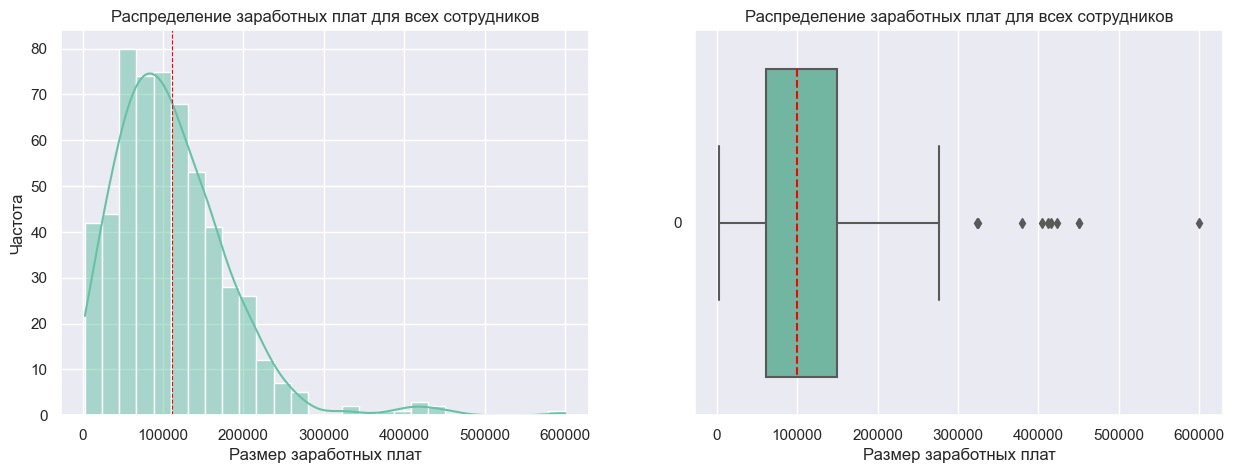

In [12]:
draw_histplot_with_boxplot(data['salary_in_usd'], 
                           'Распределение заработных плат для всех сотрудников', 
                           'Размер заработных плат', 
                           'Частота')

In [13]:
data_agg = data['salary_in_usd'].describe().round(2).to_frame()
data_agg

,salary_in_usd
count,565.00
mean,110610.34
std,72280.70
min,2859.00
25%,60757.00
50%,100000.00
75%,150000.00
max,600000.00


Распределение заработных плат отлично от нормального, имеются выбросы.  

Посмотрим на распределение логарифмированного признака salary.

/opt/anaconda3/envs/python3_12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


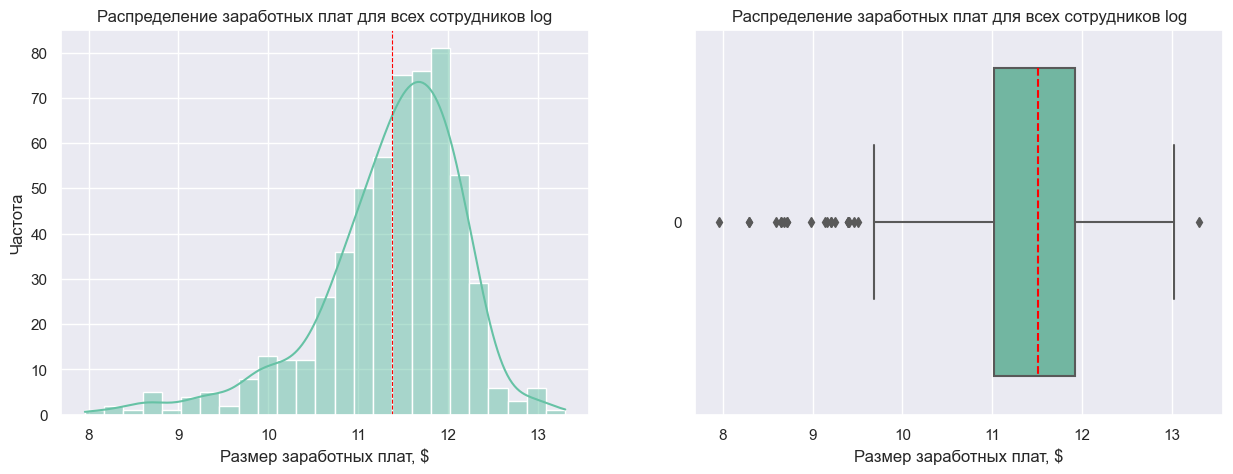

In [14]:
data['salary_log'] = np.log(data['salary_in_usd'])

draw_histplot_with_boxplot(data['salary_log'],
                           title='Распределение заработных плат для всех сотрудников log',
                           xlabel='Размер заработных плат, $', 
                           ylabel='Частота')

Логарифмированное распределение так же не похоже на нормальное, но имеет уже левый хвост.  
Удалим salary_log

In [15]:
data.drop(columns='salary_log', inplace=True)

Проверим на кол-во выбросов

In [16]:
outliers, cleaned = outliers_iqr_mod(data, 'salary_in_usd')

print(f"Outliers count: {outliers.shape[0]}")

Outliers count: 10


In [17]:
outliers

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2020,EX,FT,Data Scientist,325000,United States,100,United States,L
33,2020,MI,FT,Research Scientist,450000,United States,0,United States,M
63,2020,SE,FT,Data Scientist,412000,United States,100,United States,L
97,2021,MI,FT,Data Analyst,450000,United States,100,United States,L
157,2021,MI,FT,ML Engineer,423000,United States,50,United States,L
225,2021,EX,CT,Data Scientist,416000,United States,100,United States,S
252,2021,EX,FT,Data Engineer,600000,United States,100,United States,L
482,2022,EX,FT,Data Engineer,324000,United States,100,United States,M
519,2022,SE,FT,Data Scientist,380000,United States,100,United States,L
523,2022,SE,FT,Data Analyst,405000,United States,100,United States,L


In [18]:
# присвоим очищенному датасету название data
data = cleaned.copy(deep=True)

**Проверка на нормальность распределения признака *salary_in_usd***

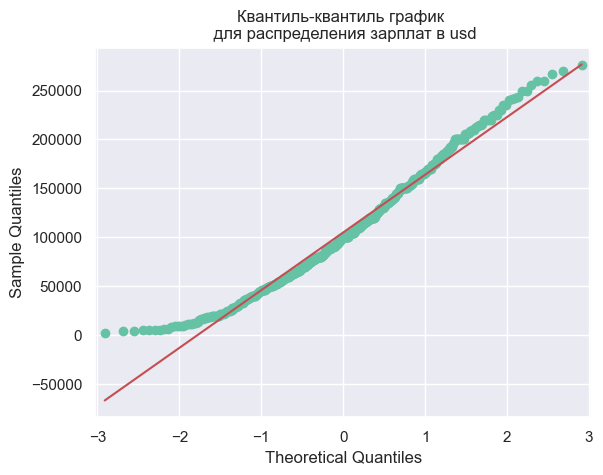

In [19]:
# задаём параметры квантиль-квантиль графика
sm.qqplot(data.salary_in_usd, line='s')
plt.title('Квантиль-квантиль график \n для распределения зарплат в usd')

# отображаем квантиль-квантиль график
plt.show()

Так как не все точки лежат вдоль диагонали, то распределение признака не нормальное. Для большей уверенности в этом, проведем тест на нормальность распределения признака.

In [20]:
# проведем проверку на нормальность распределения используя стат. тест Шапиро — Уилка
# зададим уровень значимости
alpha = 0.05 

# проверим на нормальность распределение с помощью теста Шапиро-Уилка
shapiro_distribution_tests([[data.salary_in_usd, 'salary_in_usd']], alpha=alpha)


salary_in_usd:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
__________________ 



Выводы:  
- QQ-plot и тест Шапиро-Уилка однозначно подтверждает, что распределение признака не нормальное
- в данных имеется 10 выбросов (значения от \\$324000 и выше)

Интересные наблюдения:  
- Все сотрудники, посчитанные как выброс, проживают в США
- Страной головного офиса работодателя в выборке с выбросами, так же является США

### признак `work_year`  
*Год, в котором была выплачена зарплата*.

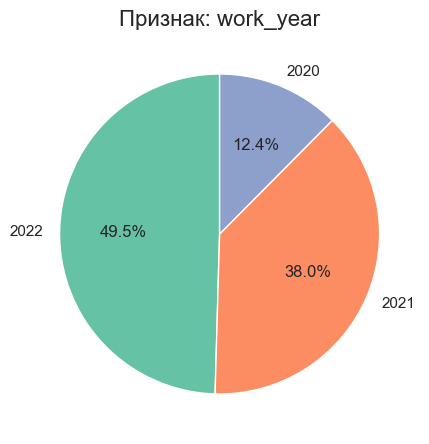

,count,proportion
work_year,,
2022,275,49.55
2021,211,38.02
2020,69,12.43


In [21]:
show_categorical_metrics(data.work_year, name='work_year')

Выводы:  
- Почти 50% наблюдений относятся к 2022 году,
- 38% к 2021.
- 12% наблюдений за 2020 год 

### признак `experience_level`  
*Опыт работы на этой должности в течение года*

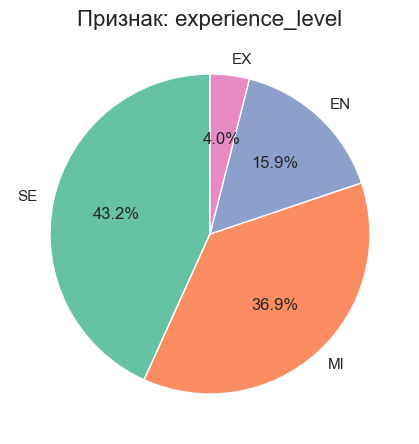

,count,proportion
experience_level,,
SE,240,43.24
MI,205,36.94
EN,88,15.86
EX,22,3.96


In [22]:
show_categorical_metrics(data.experience_level, name='experience_level')

Выводы:  
- Большую часть рынка 80% составляют работники с опытом работы SE(Senior) и MI(Middle):  43% и 37% соответственно.
- Начинающие специалисты занимают лишь 15% рынка.
- На руководящих позициях трудятся 4.6% 

### признак `employment_type`  
*Тип трудоустройства*

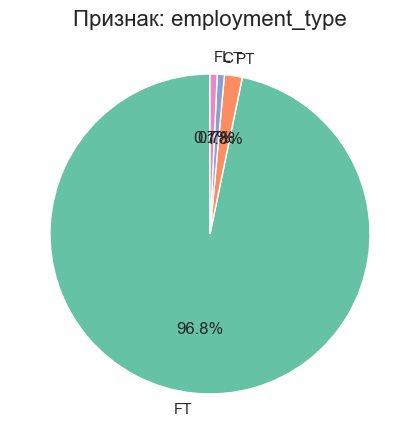

,count,proportion
employment_type,,
FT,537,96.76
PT,10,1.80
CT,4,0.72
FL,4,0.72


In [23]:
show_categorical_metrics(data.employment_type, name='employment_type')

Выводы:  
- Почти 97% работников трудоустроены по графику "Полный рабочий день"
- Почти 1.8% трудоустроены на "Не полный рабочий день"

### признак job_title  
*Роль, в которой соискатель работал в течение года.*

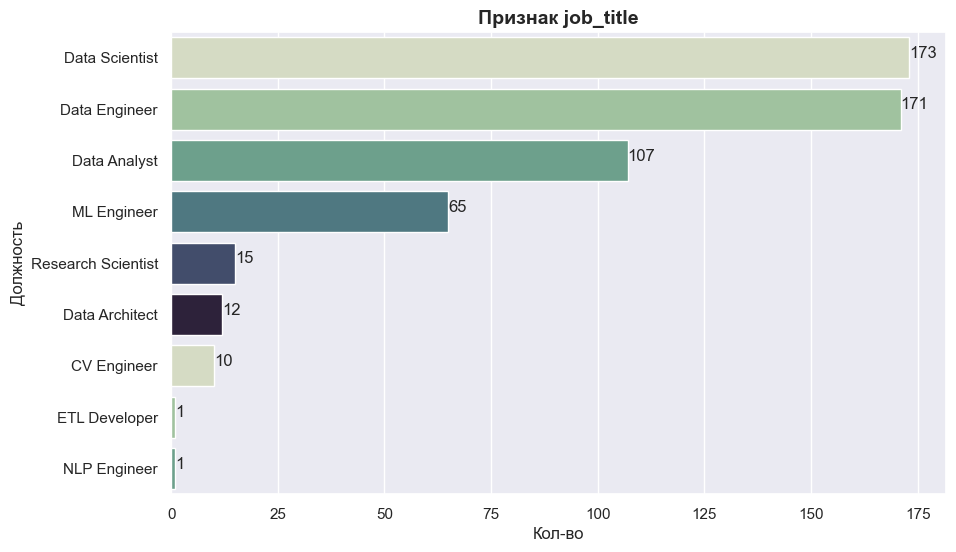

,count,proportion
job_title,,
Data Scientist,173,31.17
Data Engineer,171,30.81
Data Analyst,107,19.28
ML Engineer,65,11.71
Research Scientist,15,2.70
Data Architect,12,2.16
CV Engineer,10,1.80
ETL Developer,1,0.18
NLP Engineer,1,0.18


In [24]:
barplot_categorical_feature(data.job_title, 
                            'Признак job_title', 'Кол-во', 'Должность')

In [25]:
# show_categorical_metrics(data.job_title, name='job_title')

Выводы:  
В выборке явно выделяются 4 самые крупные роли:  
- Data Scientist - 31.33%
- Data Engineer - 30.62%
- Data Analyst - 19.29%
- ML Engineer - 11.68%

Они покрывают почти 93% от всей выборки.  
Между тем стоит отметить почти равные доли таких позиций как Data Scientist и Data Engineer.  
Самыми малочисленными ролями являются:  
- ETL Developer - 0.18%
- NLP Engineer - 0.18%

### признак employee_residence  
*Основная страна проживания сотрудника*  

Значения признака приведены в виде кода страны ISO 3166.  
Для лучшего понимание стоит, перевести их в более удобный вид.

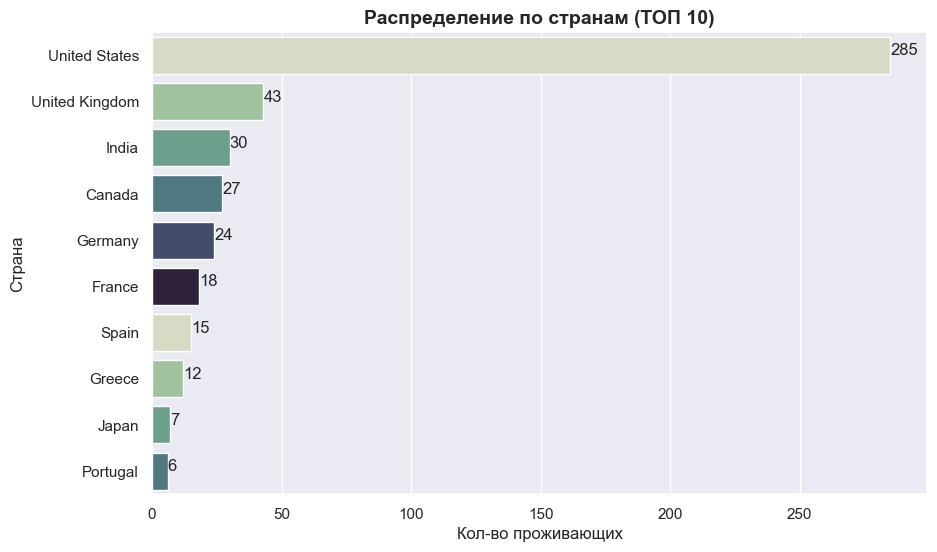

,count,proportion
employee_residence,,
United States,285,51.35
United Kingdom,43,7.75
India,30,5.41
Canada,27,4.86
Germany,24,4.32
France,18,3.24
Spain,15,2.70
Greece,12,2.16
Japan,7,1.26


In [27]:
barplot_categorical_feature(data.employee_residence, 
                            'Распределение по странам (ТОП 10)', 
                            'Кол-во проживающих', 
                            'Страна')

Выводы:  
Топ-5 стран где проживает большое всего специалистов в сфере DS:
1. United States - 52.21%
2. United Kingdom - 7.61%
3. India - 5.31%
4. Canada - 4.78%
5. Germany - 4.25%

52.2% всех сотрудников из выборки в сфере Data Science проживает и работает в США.

### признак company_location  
*Страна главного офиса работодателя*  

Значения признака приведены в виде кода страны ISO 3166.  
Для лучшего понимание стоит, перевести их в более удобный вид.

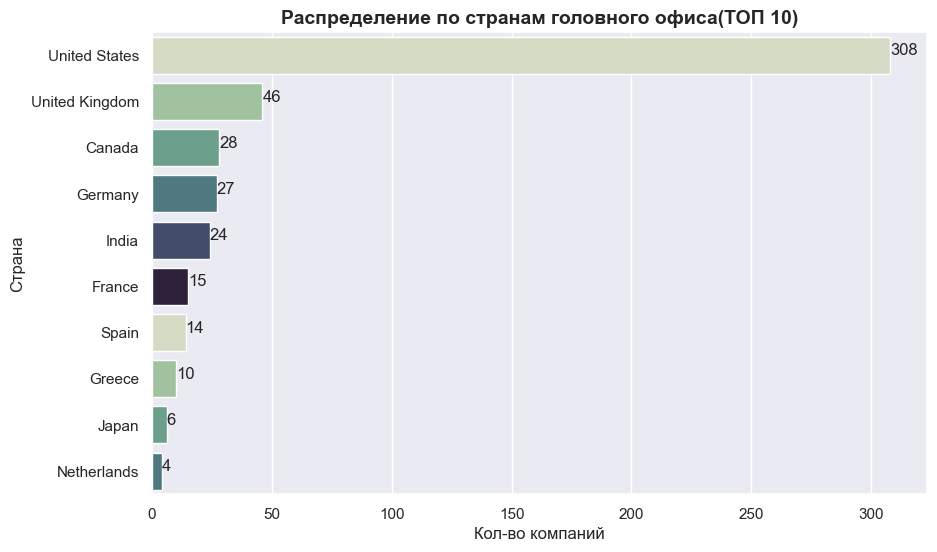

,count,proportion
company_location,,
United States,308,55.50
United Kingdom,46,8.29
Canada,28,5.05
Germany,27,4.86
India,24,4.32
France,15,2.70
Spain,14,2.52
Greece,10,1.80
Japan,6,1.08


In [28]:
barplot_categorical_feature(data.company_location, 
                            'Распределение по странам головного офиса(ТОП 10)', 
                            'Кол-во компаний', 
                            'Страна')

Выводы:  
- Признак имеет почти схожее с признаком `employee_residence` распределение, но есть различия.
Топ 5 страны:
1. United States - 58.48%
2. United Kingdom - 7.74%
3. Canada - 4.94%
4. Germany - 4.61%
5. India - 3.95%

58.5% компаний распологаются в США 

### признак remote_ratio  
*Общий объём работы, выполняемой удалённо.*  

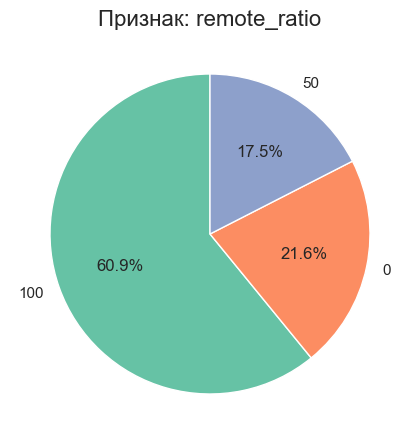

,count,proportion
remote_ratio,,
100,338,60.90
0,120,21.62
50,97,17.48


In [30]:
show_categorical_metrics(data.remote_ratio, name='remote_ratio')

Выводы:  
- 61% респондентов работают полностю удаленно ( более 80% времени)
- 17% половину своего рабочего времени проводят удаленно
- 21% сотрудников работают исключительно в офисе

### признак company_size  
*Среднее количество людей, работавших в компании*  

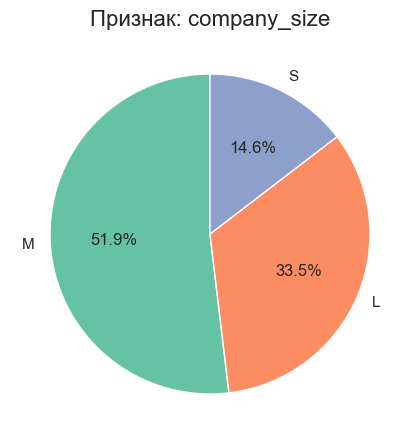

,count,proportion
company_size,,
M,288,51.89
L,186,33.51
S,81,14.59


In [31]:
show_categorical_metrics(data.company_size, name='company_size')

Выводы:  
- Средние компании - 51.3% ( имеют от 50 до 250 сотрудников)
- Крупные компании - 34.2% (имеют более 250 сотрудников)
- Небольшие компании - 14.5% (имеют менее 50 сотрудников)

## Ответы на вопросы бизнеса  
[❎ **К ОГЛАВЛЕНИЮ**](#ОГЛАВЛЕНИЕ)

### 4.1 Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
[❎ **К ОГЛАВЛЕНИЮ**](#ОГЛАВЛЕНИЕ)

Total DS entries: 173


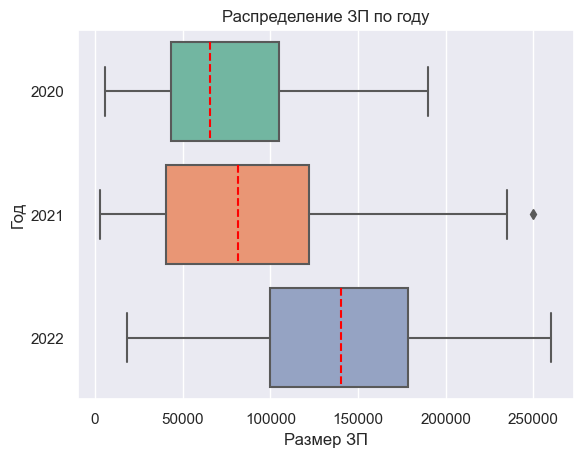

In [32]:
# отфильтруем записи только по Data Scientist
mask = data['job_title'] == 'Data Scientist'
ds_data = data[mask]
print(f'Total DS entries: {ds_data.shape[0]}')

ax = sns.boxplot(ds_data, x='salary_in_usd', 
                 y='work_year', 
                 orient='h', 
                 medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Год')
plt.title('Распределение ЗП по году')
plt.show()

In [33]:
data_agg = ds_data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Уровень ЗП в зависимости от года')
data_agg

Уровень ЗП в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,26.0,76970.96,43872.86,5707.0,43087.75,65577.0,105000.00,190000.0
2021,72.0,89232.92,61374.02,2859.0,40437.00,81250.0,121794.25,250000.0
2022,75.0,135698.04,56344.77,18442.0,99680.00,140000.0,178500.00,260000.0


На первый взгляд распределения ЗП в разные года различны и растут от года к году.  
Чтобы ответить на этот вопрос наверняка, проведём статистическое тестирование.

**Сформулируем гипотезы:**  
- *Нулевая гипотеза* ($H_0$): размер ЗП не зависит от года: 2020 ($μ_1$), 2021 ($μ_2$), 2022 ($μ_3$) 

$$ H_0 : μ_1 = µ_2 = µ_3$$
- *Альтернативная гипотеза* ($H_1$): размер ЗП зависит от года.

$$H_1: µ_1 \neq µ_2 \neq µ_3$$ 


In [34]:
# значения заработных плат по годам
salary_2020 = ds_data.loc[ds_data['work_year']==2020, 'salary_in_usd']
salary_2021 = ds_data.loc[ds_data['work_year']==2021, 'salary_in_usd']
salary_2022 = ds_data.loc[ds_data['work_year']==2022, 'salary_in_usd']

# проверим на нормальность распределения с помощью теста Шапиро-Уилка
shapiro_distribution_tests([[salary_2020, '2020 год'], 
                            [salary_2021, '2021 год'], 
                            [salary_2022, '2022 год']])

2020 год:
p-value = 0.206
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

2021 год:
p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
__________________ 

2022 год:
p-value = 0.328
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 



**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:  
- Какой тип у признака `salary_in_usd`? — Количественный.
- Сколько сравниваемых групп? — Три.
- Группы зависимы? — Нет.
- Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать критерий Краскела-Уоллиса.

**Проведём тест**

In [35]:
# проводим тест
_, p = stats.kruskal(salary_2020, salary_2021, salary_2022)
decision_hypothesis(p)


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**  
И графически и статистически мы подтвердили, что наблюдается ежегодный рост зарплат у специалистов Data Scientist.  
Так в 2020 году медианный уровень зп составлял \\$65500, в 2021 году уже \\$81250, а в 2022 году \\$140000, что говорит о востребованности данной профессии с течением времени.

### 4.2 Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
[❎ **К ОГЛАВЛЕНИЮ**](#ОГЛАВЛЕНИЕ)

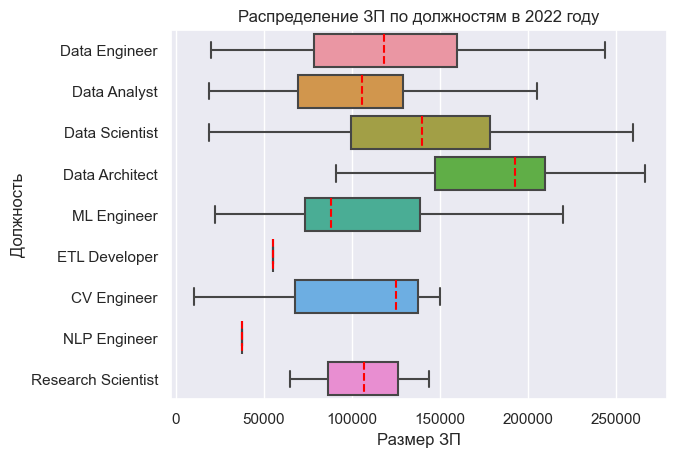

In [36]:
mask = data['work_year'] == 2022
data_2022 = data[mask]

# визуализируем распределение зп по должностям с помощью коробчатой диаграммы (boxplot)
ax = sns.boxplot(data_2022, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Должность')
plt.title('Распределение ЗП по должностям в 2022 году')
plt.show()

In [37]:
data_agg = data_2022.groupby('job_title')['salary_in_usd'] \
                    .describe() \
                    .sort_values(by=['50%'], ascending=False) \
                    .round(2)
print('ЗП в зависимости от должности')
data_agg

ЗП в зависимости от должности


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Architect,8.0,182076.62,53336.64,90700.0,147063.5,192482.0,209861.25,266400.0
Data Scientist,75.0,135698.04,56344.77,18442.0,99680.0,140000.0,178500.00,260000.0
CV Engineer,3.0,95000.00,74665.92,10000.0,67500.0,125000.0,137500.00,150000.0
Data Engineer,90.0,123140.01,53517.55,20000.0,78526.0,117988.0,159750.00,243900.0
Research Scientist,4.0,105569.00,34111.30,64849.0,86282.5,106713.5,126000.00,144000.0
Data Analyst,66.0,101231.48,41686.74,18442.0,69478.0,105630.0,128968.75,205300.0
ML Engineer,27.0,107868.70,54478.93,21983.0,73222.0,87932.0,138666.50,220000.0
ETL Developer,1.0,54957.00,NaN,54957.0,54957.0,54957.0,54957.00,54957.0
NLP Engineer,1.0,37236.00,NaN,37236.0,37236.0,37236.0,37236.00,37236.0


Исходя из описательных статистик уровня зп в 2022 году и графика распределения boxplot, можно выделить ТОП-3 роли с самыми высокими медианными заработными платами:  
1. Data Architect - \\$192482.0
2. Data Scientist - \\$140000.0
3. CV Engineer - \\$125000.0
 
Однако, стоит учесть, что выборка на позицию CV Engineer слишком мала(всего 3 записи).  
Поэтому мы отдадим третье место роли Data Engineer	- \\$117988.0.

Исходя из полученных выше данных, можно предположить, что уровень ЗП у Data Scientist выше чем у Data Engineer.  
Давайте проверим это с помощью статистического анализа.

Предположим, что размер заработной платы для Data Scientist выше чем для Data Engineer в 2022 году. 

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зп для Data Scientist ($μ_1$) статистически меньше либо равен размеру зп для Data Engineer ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер зп для Data Scientist ($μ_1$) статистически больше, чем размер зп для Data Engineer ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.  
Напомним гипотезы теста Шапиро-Уилка:  
- *Нулевая гипотеза* ($H_0$): распределение данных является нормальным.
- *Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [38]:
# значения заработных плат
salary_ds = data_2022.loc[data_2022['job_title']=='Data Scientist', 'salary_in_usd']
salary_de = data_2022.loc[data_2022['job_title']=='Data Engineer', 'salary_in_usd']

# проверим распределения на нормальность с помощью теста Шапиро-Уилка
shapiro_distribution_tests([[salary_ds, 'Data Scientist'], 
                            [salary_de, 'Data Engineer']])


Data Scientist:
p-value = 0.328
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

Data Engineer:
p-value = 0.063
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 



**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»(Зарплата в долларах США)? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Да.

Чтобы проверить нашу гипотезу, можно использовать **двухвыборочный t-критерий** для сравнения средних значений в двух независимых группах.

Однако, для использования этого критерия необходимо так же установить равенство (или неравенство) дисперсий в выборках. Для проверки равенства дисперсий воспользуемся тестом Левена.  

**Проведём тест**

In [39]:
# Проведём тест на равенство дисперсий в выборках и 
# определим значение параметра equal_var для теста stats.ttest_ind
is_variances_equal = levene_test(salary_ds, salary_de)

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(salary_ds, salary_de, alternative='greater', equal_var=is_variances_equal)
decision_hypothesis(p)


Тест на равенство дисперсий
p-value = 0.749
Дисперсии одинаковы, в stats.ttest_ind используем параметр equal_var=True.

Тест на равенство средних
p-value = 0.072
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:**  
Таким образом мы с уверенность можем утверждать, что в 2022 году средний уровень ЗП Data Scientist не превышал таковой у Data Engineer.

### 4.3 Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
[❎ **К ОГЛАВЛЕНИЮ**](#ОГЛАВЛЕНИЕ)

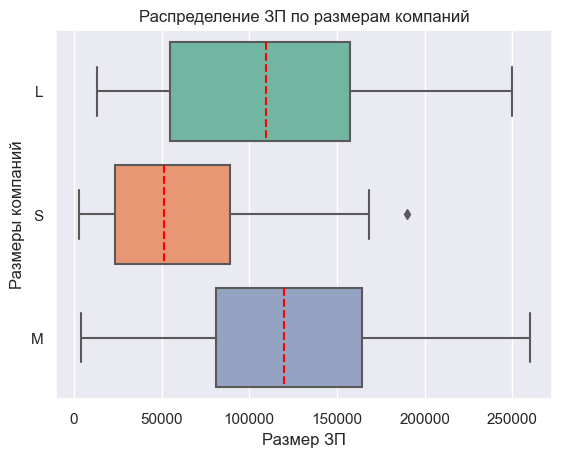

In [40]:
mask = data['job_title'] == 'Data Scientist'
ds_df = data[mask]

ax = sns.boxplot(ds_df, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Размеры компаний')
plt.title('Распределение ЗП по размерам компаний')
plt.show()

In [41]:
data_agg = ds_df.groupby('company_size')['salary_in_usd'] \
                .describe() \
                .sort_values(by=['50%'], ascending=False) \
                .round(2)
print('ЗП Data Scientist в зависимости от размера компании')
data_agg

ЗП Data Scientist в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
M,78.0,121277.22,57834.12,4000.0,81250.0,120080.0,164418.5,260000.0
L,64.0,113121.98,63927.97,13400.0,54809.5,109518.5,157300.0,250000.0
S,31.0,61417.35,44984.57,2859.0,23600.5,51321.0,88869.0,190000.0


На первый взгляд кажется, что уровни ЗП в компаниях разных размеров различны.  
Давайте выясним это опираясь на силу статистических тестов.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): уровни зп для компаний размеров S($μ_1$) M($μ_2$) и L($μ_3$) равны между собой.

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза* ($H_1$): уровни зп для компаний размеров S($μ_1$) M($μ_2$) и L($μ_3$) не равны между собой.

$$ H_1 : μ_1 \neq μ_2 \neq µ_3$$

In [42]:
# значения заработных плат
salary_size_s = ds_df.loc[ds_df['company_size']=='S', 'salary_in_usd']
salary_size_m = ds_df.loc[ds_df['company_size']=='M', 'salary_in_usd']
salary_size_l = ds_df.loc[ds_df['company_size']=='L', 'salary_in_usd']

# проверим распределения на нормальность с помощью теста Шапиро-Уилка
shapiro_distribution_tests([[salary_size_s, 'company_size S'], 
                            [salary_size_m, 'company_size M'],
                           [salary_size_l, 'company_size L']])


company_size S:
p-value = 0.019
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
__________________ 

company_size M:
p-value = 0.807
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

company_size L:
p-value = 0.011
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
__________________ 



**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:  
- Какой тип у признака `salary_in_usd`? — Количественный.
- Сколько сравниваемых групп? — Три.
- Группы зависимы? — Нет.
- Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать критерий Краскела-Уоллиса.

**Проведём тест**

In [43]:
# проводим тест
_, p = stats.kruskal(salary_size_s, salary_size_m, salary_size_l)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**  
Мы статистически подтвердили наличия разницы в уровне заработных плат в компаниях разных размеров, а именно:  
- меньше всего получают в компаниях размера S, медиана ЗП на уровне \\$51000  
- более чем в 2 раза платят в компаниях размера L, мениана на уровне \\$109518 
- больше всех платят в компаниях размера M, мениана на уровне \\$120080

### 4.4 Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
[❎ **К ОГЛАВЛЕНИЮ**](#ОГЛАВЛЕНИЕ)

Чтобы ответить на этот вопрос необходимо проанализировать взаимосвязь между двумя признаками объектов одной выборки.  Для этого используем критерий Хи-квадрат.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): признаки *company_size* ($μ_1$) и *job_title* M($μ_2$) независимы.  
*Альтернативная гипотеза* ($H_1$): признаки *company_size* ($μ_1$) и *job_title* M($μ_2$) взаимосвязаны.


Для начала нам нужно предобработаться наши данные и создать дополнительный бинарный признак *ds_or_de* - является ли должность в признаке *job_title* Data Scientist и Data Engineer.

In [44]:
# data preprocessing
data['ds_or_de'] = 'No'
mask = data['job_title'].isin(['Data Scientist', 'Data Engineer'])
data.loc[mask, 'ds_or_de'] = 'Yes'

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): между наличием должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза* ($H_1$): между наличием должностей Data Scientist и Data Engineer и размером компании есть взаимосвязь (признаки зависимы).

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «company_size»? — Категориальный.
* Сколько сравниваемых групп? — Три.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

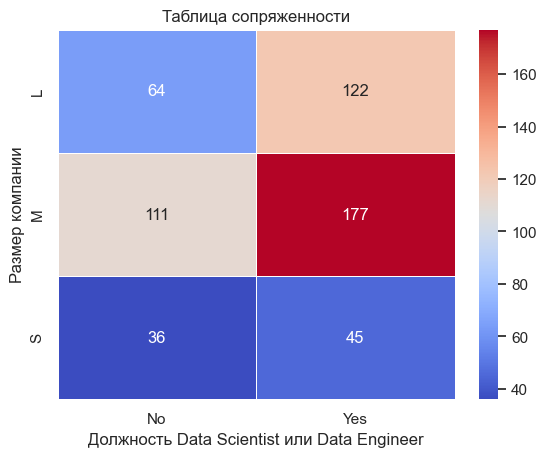

p-value = 0.289
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [45]:
# задаём уровень значимости
alpha = 0.05 

# вычисляем таблицу сопряжённости
cross_table = pd.crosstab(data['company_size'], data['ds_or_de'])

# отобразим таблицу сопряженности
ax = sns.heatmap(cross_table, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Должность Data Scientist или Data Engineer', ylabel='Размер компании')
plt.title('Таблица сопряженности')
plt.show()


# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)


**Вывод:**  
Таким образом мы можем утверждать, что связи между этими признаками нет, они независимы.

### 4.5 Какие факторы влияют на зарплату специалиста Data Scientist?
[❎ **К ОГЛАВЛЕНИЮ**](#ОГЛАВЛЕНИЕ)

Чтобы ответить на вопрос выше мы проанализируем отдельно взаимосвязь каждого признака с заработной платой.

In [46]:
# отфильтруем записи только по Data Scientist
mask = data['job_title'] == 'Data Scientist'
ds_data = data[mask]
print(f'Total DS entries: {ds_data.shape[0]}')

Total DS entries: 173


**4.4.1 признак work_year**  
Влияет ли год получения зп на ее уровень?  

На этот вопрос был получен ответ в п 4.1 данного проекта. 

**4.4.2 признак experience_level**  
Влияет ли опыт работы на уровень заработной платы?

**Сформулируем гипотезы:**  
- *Нулевая гипотеза* ($H_0$): размер ЗП не зависит от опыта работы: EN ($μ_1$), MI ($μ_2$), SE ($μ_3$), EX ($μ_4$) 

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$
- *Альтернативная гипотеза* ($H_1$): размер ЗП зависит от опыта работы.

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$ 


In [65]:
# значения заработных плат
salary_en = ds_data.loc[ds_data['experience_level']=='EN', 'salary_in_usd']
salary_mi = ds_data.loc[ds_data['experience_level']=='MI', 'salary_in_usd']
salary_se = ds_data.loc[ds_data['experience_level']=='SE', 'salary_in_usd']
salary_ex = ds_data.loc[ds_data['experience_level']=='EX', 'salary_in_usd']

# проверим на нормальность распределения с помощью теста Шапиро-Уилка
shapiro_distribution_tests([[salary_en, 'experience_level EN'], 
                            [salary_mi, 'experience_level MI'], 
                            [salary_se, 'experience_level SE'],
                            [salary_ex, 'experience_level EX']])



experience_level EN:
p-value = 0.092
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

experience_level MI:
p-value = 0.094
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

experience_level SE:
p-value = 0.869
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

experience_level EX:
p-value = 0.474
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 



**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:  
- Какой тип у признака `salary_in_usd`? — Количественный.
- Сколько сравниваемых групп? — Четыре.
- Группы зависимы? — Нет.
- Признак распределён по нормальному закону? — Да.
<!-- - Признак распределён по нормальному закону? — Нет, так как не все выборки распределены нормально. -->

Для проверки нашей гипотезы можно использовать Однофакторный дисперсионный анализ (ANOVA)
<!-- критерий Краскела — Уоллиса. -->

Для проведения теста ANOVA требуется проверить распределения в группах на равенство дисперсий. Сделаем это с помощью теста Левена.

In [66]:
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(salary_en, salary_mi, salary_se, salary_ex)
p = result[1]
decision_hypothesis(p)

Тест на равенство дисперсий
p-value = 0.033
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Таким образом равенство дисперсий в выборках не подтвердилась и мы не можем использовать Однофакторный дисперсионный анализ (ANOVA). Поэтому воспользуемся тестом Уэлча (Welch's ANOVA) - это модификация стандартного ANOVA, которая не требует равенства дисперсий. Тест Уэлча более устойчив к различиям в дисперсиях между группами и является хорошей альтернативой в случае нарушения этого предположения.

Тест Уэлча реализован в бибилиотеке pingouin, которую необходимо заранее установить.

In [68]:
# !pip install -q pingouin

In [69]:
import pingouin as pg 

Подготовим наши данные для подачи в тест Уэлча

In [102]:
# размерности групп
en_shape = salary_en.shape[0]
mi_shape = salary_mi.shape[0]
se_shape = salary_se.shape[0]
ex_shape = salary_ex.shape[0]


experience_levels = ['level EN'] * en_shape + \
                    ['level MI'] * mi_shape + \
                    ['level SE'] * se_shape + \
                    ['level EX'] * ex_shape


# добавим все значения зп по группам в один массив np.array
salaries = np.concatenate([salary_en.values,
                           salary_mi.values,
                           salary_se.values,
                           salary_ex.values])


salaries_df = pd.DataFrame({'salary': salaries, 
                            'level': experience_levels,
                           }) 

# проводим тест Welch's ANOVA 
welch_res = pg.welch_anova(dv='salary', between='level', data=salaries_df) 
print("Summary Welch's ANOVA test:")
display(welch_res)
p = welch_res['p-unc'].values[0]
decision_hypothesis(p)

,salary,level
105,53192,level SE
4,21669,level EN
84,200000,level MI
56,5679,level MI
44,42197,level MI


Summary Welch's ANOVA test:


,Source,ddof1,ddof2,F,p-unc,np2
0,level,3,41.022571,42.40137,1.224605e-12,0.400183


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Теперь мы с уверенностью можем утверждать, что опыт работы влияет на уровень заработной платы.

**4.4.3 признак employment_type**  
Влияет ли тип трудоустройства на уровень заработной платы?

**Сформулируем гипотезы:**  
- *Нулевая гипотеза* ($H_0$): размер ЗП не зависит от типа трудоустройства: FT ($μ_1$), CT ($μ_2$), PT ($μ_3$), FL ($μ_4$)

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$
- *Альтернативная гипотеза* ($H_1$): размер ЗП зависит от типа трудоустройства:

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$ 


In [103]:
# значения заработных плат
salary_ft = ds_data.loc[ds_data['employment_type']=='FT', 'salary_in_usd']
salary_pt = ds_data.loc[ds_data['employment_type']=='PT', 'salary_in_usd']
salary_ct = ds_data.loc[ds_data['employment_type']=='CT', 'salary_in_usd']
salary_fl = ds_data.loc[ds_data['employment_type']=='FL', 'salary_in_usd']

# проверим на нормальность распределения с помощью теста Шапиро-Уилка
shapiro_distribution_tests([[salary_ft, 'FT - полный рабочий день'], 
                            [salary_pt, 'PT — неполный рабочий день'], 
                            [salary_ct, 'CT — контракт'],
                            [salary_fl, 'FL — фриланс']])


FT - полный рабочий день:
p-value = 0.003
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
__________________ 

PT — неполный рабочий день:
p-value = 0.014
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
__________________ 

CT — контракт:
Не достаточно сэмплов для теста Шапиро-Уилка!

FL — фриланс:
Не достаточно сэмплов для теста Шапиро-Уилка!



**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:  
- Какой тип у признака `salary_in_usd`? — Количественный.
- Сколько сравниваемых групп? — Четыре.
- Группы зависимы? — Нет.
- Признак распределён по нормальному закону? — Нет

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [104]:
# проводим тест
_, p = stats.kruskal(salary_ft, salary_pt)
decision_hypothesis(p)

p-value = 0.016
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Теперь мы с уверенностью можем утверждать, что тип трудоустройства влияет на уровень заработной платы.

**4.4.4 признак employee_residence**  
Влияет ли страна проживания сотрудника на уровень заработной платы?  



Посмотрим сначала на медианы заработных плат в разрезе стран проживания

In [133]:
country_grouped = ds_data.groupby('employee_residence').salary_in_usd.median().reset_index()
top_10_by_median_salary = country_grouped.sort_values(by='salary_in_usd', ascending=False)[:10]

# посчитаем кол-во проживающих в этих странах
mask = ds_data.employee_residence.isin(top_10_by_median_salary.employee_residence.tolist())
quantity_per_countries = ds_data[mask]['employee_residence'].value_counts(ascending=False) \
                                                            .reset_index()

# сведем расчеты выше в один датафрейм
joined_top_10_med_countries = top_10_by_median_salary.merge(
    quantity_per_countries,
    on='employee_residence',
    how='left'
)
display(joined_top_10_med_countries)

,employee_residence,salary_in_usd,count
0,Malaysia,200000.0,1
1,United States,141300.0,81
2,Switzerland,122346.0,1
3,Singapore,119059.0,1
4,United Arab Emirates,115000.0,1
5,Japan,104000.0,2
6,Slovenia,102839.0,1
7,Algeria,100000.0,1
8,Austria,91237.0,1
9,Canada,87738.0,7


Из таблицы выше видно, что больше всех медиана зп в Малайзии, так как там всего 1 работник, который, скорее всего работает на Американскую компанию. 
Давайте проверим эту догатку ниже

In [158]:
mask = ds_data.employee_residence == 'Malaysia'
malaysia_data = ds_data[mask]
malaysia_data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,ds_or_de
490,2022,SE,FT,Data Scientist,200000,Malaysia,100,United States,M,Yes


Так и есть. Один сотрудник из Малайзии, который работает полностью удаленно на Американскую компанию. 
Таким образом он не плохо экономит на налогах и расходах на жизнь, но не уже другая история....

Для более информативного анализа стоит стоит рассмотреть страны с самым большим кол-вом респондентов.  Так мы получим более точные статистики на тестах.

In [159]:
# Посмотрим на топ 10 стран с самым большим кол-вом работников
top_10_countries = ds_data.employee_residence.value_counts(ascending=False)[:10] \
                          .reset_index()

# расчитаем медианы зп в топ-10 странах с самым большим кол-вом работников 
mask = ds_data.employee_residence.isin(top_10_countries.employee_residence.tolist())
median_salary_by_top_10 = ds_data[mask].groupby('employee_residence').salary_in_usd \
                                       .median() \
                                       .reset_index() \
                                       .sort_values(by='salary_in_usd', ascending=False)


# сведем данные в одну таблицу
joined_top_10_med_countries = median_salary_by_top_10.merge(
    top_10_countries,
    on='employee_residence',
    how='left'
)
# отсортируем по уровню зп по убыванию для удобства восприятия
joined_top_10_med_countries_sorted = joined_top_10_med_countries.sort_values(by='salary_in_usd', ascending=False)
display(joined_top_10_med_countries_sorted)

,employee_residence,salary_in_usd,count
0,United States,141300.0,81
1,Canada,87738.0,7
2,Italy,87668.0,2
3,Russia,85000.0,3
4,Germany,84243.5,14
5,United Kingdom,76958.0,13
6,France,51321.0,9
7,Spain,42792.5,4
8,India,28399.0,13
9,Brazil,12901.0,3


Визуально оценим распределения заработных плат по странам проживания, которые мы получили в таблице joined_top_10_med_countries_sorted

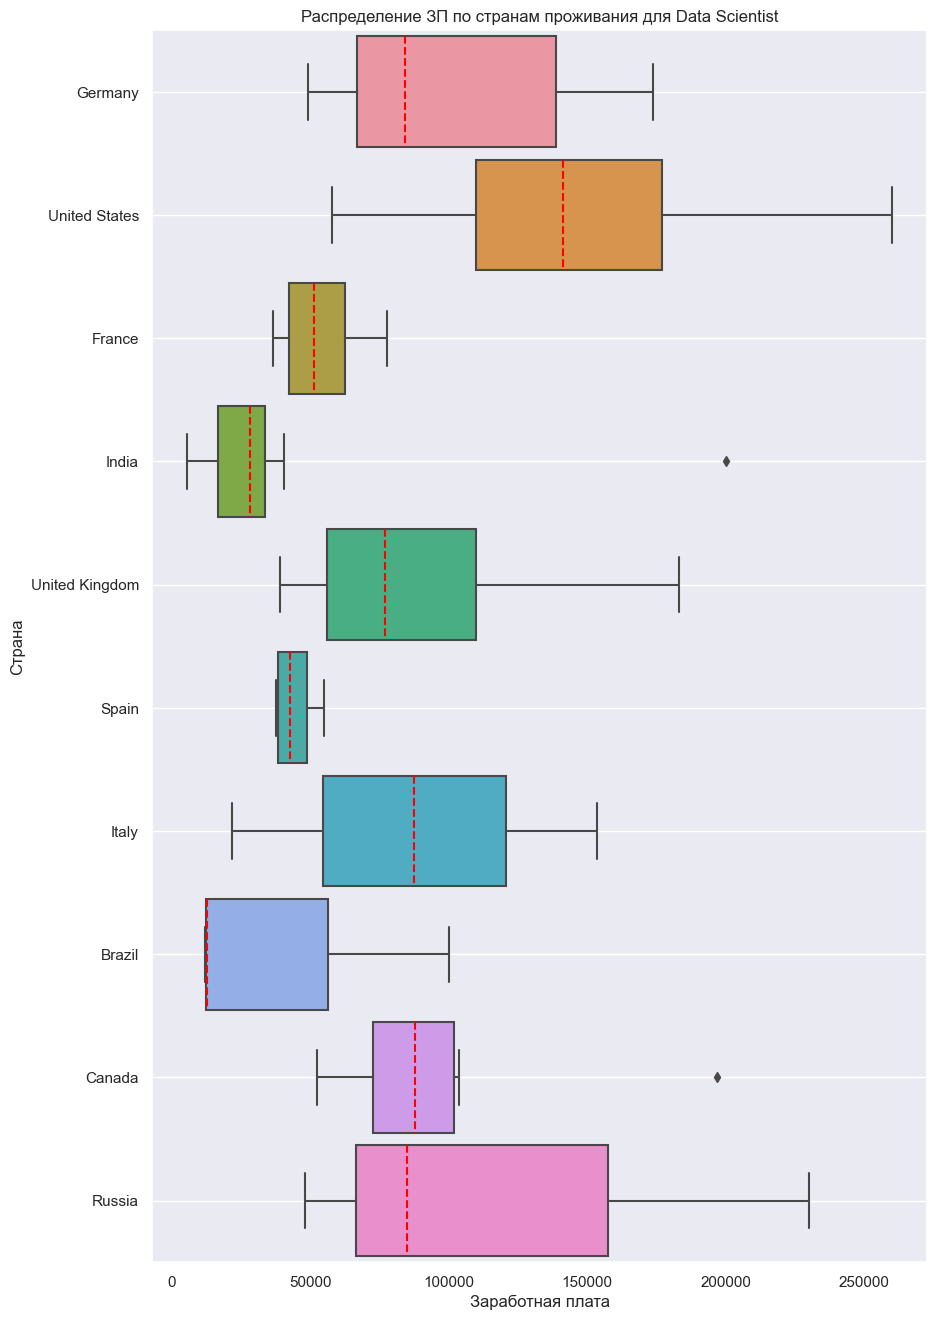

In [160]:
mask = ds_data.employee_residence.isin(joined_top_10_med_countries_sorted.employee_residence.tolist())
top_10_ds_data = ds_data[mask]

# построим коробчатую диаграмму в разрезе страны и заработной платы.
fig = plt.figure(figsize=(10, 16))
boxplot = sns.boxplot(
    data=top_10_ds_data,
    y='employee_residence',
    x='salary_in_usd',
    orient='h',
    width=0.9,
    medianprops={"color": "red", "linestyle": '--'}
)
boxplot.set_title('Распределение ЗП по странам проживания для Data Scientist');
boxplot.set_xlabel('Заработная плата');
boxplot.set_ylabel('Страна');
boxplot.grid()

По данным "ящика с усами" можно сделать предположение, что уровень зп зависит от страны проживания.

Однако, так как с таблице по некоторым странам представлены слишком малое кол-во резидентов, то для качества дальнего тестирования, выберем только те страны, в которых проживает 5 и более работников. Данное ограничение скажется положительно, ведь чем больше данных, тем точнее будет результат теста.

In [148]:
# отберем страны с кол-вом проживающих 5+
mask = top_10_countries['count'] >= 5
countries_for_test = top_10_countries[mask].employee_residence.tolist()
print('Filtered countries:', countries_for_test)


Selected countries: ['United States', 'Germany', 'India', 'United Kingdom', 'France', 'Canada']


In [149]:
# значения заработных плат
salary_us = ds_data.loc[ds_data['employee_residence']=='United States', 'salary_in_usd']
salary_gb = ds_data.loc[ds_data['employee_residence']=='United Kingdom', 'salary_in_usd']
salary_in = ds_data.loc[ds_data['employee_residence']=='India', 'salary_in_usd']
salary_ca = ds_data.loc[ds_data['employee_residence']=='Canada', 'salary_in_usd']
salary_fr = ds_data.loc[ds_data['employee_residence']=='France', 'salary_in_usd']
salary_de = ds_data.loc[ds_data['employee_residence']=='Germany', 'salary_in_usd']

# проверим на нормальность распределения с помощью теста Шапиро-Уилка
shapiro_distribution_tests([[salary_us, 'United States'], 
                            [salary_gb, 'United Kingdom'], 
                            [salary_in, 'India'],
                            [salary_fr, 'France'],
                            [salary_de, 'Germany'],
                            [salary_ca, 'Canada'],])

United States:
p-value = 0.097
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

United Kingdom:
p-value = 0.193
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

India:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
__________________ 

France:
p-value = 0.619
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

Germany:
p-value = 0.064
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

Canada:
p-value = 0.051
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 



**Сформулируем гипотезы:**    
- *Нулевая гипотеза* ($H_0$): размер ЗП не зависит от страны проживания: United States ($μ_1$), United Kingdom ($μ_2$), India ($μ_3$), Canada ($μ_4$), Germany ($μ_5$), France ($μ_6$)

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4 = μ_5 = μ_6$$
- *Альтернативная гипотеза* ($H_1$): размер ЗП зависит от страны проживания:

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4 \neq μ_5 \neq μ_6$$ 


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:  
- Какой тип у признака `salary_in_usd`? — Количественный.
- Сколько сравниваемых групп? — Шесть.
- Группы зависимы? — Нет.
- Признак распределён по нормальному закону? — Нет, так как не все выборки распределены нормально.

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [156]:
_, p = stats.kruskal(salary_us, salary_gb, salary_in, salary_fr, salary_de, salary_ca)

decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**  
Мы с уверенностью можем утверждать, что страна проживания влияет на уровень заработной платы.

**4.4.5 признак remote_ratio**  
Влияет ли объём работы, выполняемой удалённо на уровень заработной платы?

remote_ratio:  
- 0 — удалённой работы нет (менее 20 %);
- 50 — частично удалённая работа;
- 100 — полностью удалённая работа (более 80 %).

**Сформулируем гипотезы:**  
- *Нулевая гипотеза* ($H_0$): размер ЗП не зависит от наличия удаленки: 0 ($μ_1$), 50 ($μ_2$), 100 ($μ_3$)

$$ H_0 : μ_1 = μ_2 = μ_3$$
- *Альтернативная гипотеза* ($H_1$): размер ЗП зависит от наличия удаленки:

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$ 


In [161]:
# значения заработных плат
salary_no_remote = ds_data.loc[ds_data['remote_ratio']==0, 'salary_in_usd']
salary_half_remote = ds_data.loc[ds_data['remote_ratio']==50, 'salary_in_usd']
salary_full_remote = ds_data.loc[ds_data['remote_ratio']==100, 'salary_in_usd']

# проверим на нормальность распределения с помощью теста Шапиро-Уилка
shapiro_distribution_tests([[salary_no_remote, 'remote_ratio: 0'], 
                            [salary_half_remote, 'remote_ratio: 50'], 
                            [salary_full_remote, 'remote_ratio: 100']])


remote_ratio: 0:
p-value = 0.490
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

remote_ratio: 50:
p-value = 0.012
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
__________________ 

remote_ratio: 100:
p-value = 0.043
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
__________________ 



**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:  
- Какой тип у признака `salary_in_usd`? — Количественный.
- Сколько сравниваемых групп? — Три.
- Группы зависимы? — Нет.
- Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [162]:
_, p = stats.kruskal(salary_no_remote, salary_half_remote, salary_full_remote)
decision_hypothesis(p)

p-value = 0.009
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**  
Мы с уверенностью можем утверждать, что работа на удаленке влияет на уровень заработной платы

**4.4.6 признак company_location**  
Влияет ли расположение головного офиса компании на уровень заработной платы?

In [170]:
# посмотрим на распределение по странам 
company_loc_counted = ds_data.company_location.value_counts(ascending=False) \
                                           .reset_index()
company_loc_counted

,company_location,count
0,United States,91
1,Germany,14
2,United Kingdom,12
3,India,10
4,Canada,7
5,France,7
6,Spain,5
7,Russia,2
8,Poland,2
9,Austria,2


Как видно мы получили очень похожие с признаком страны проживания сотрудника значения.  
Поэтому, оставим только страны, которые представлены более 5 записями в таблице.

In [181]:
# отберем страны с кол-вом 5+
mask = comp_loc_counted['count'] > 5
top_countries = comp_loc_counted[mask].company_location.tolist()
pprint('Top 5 countries:')
print(top_countries)

'Top 5 countries:'
['United States', 'Germany', 'United Kingdom', 'India', 'Canada', 'France']


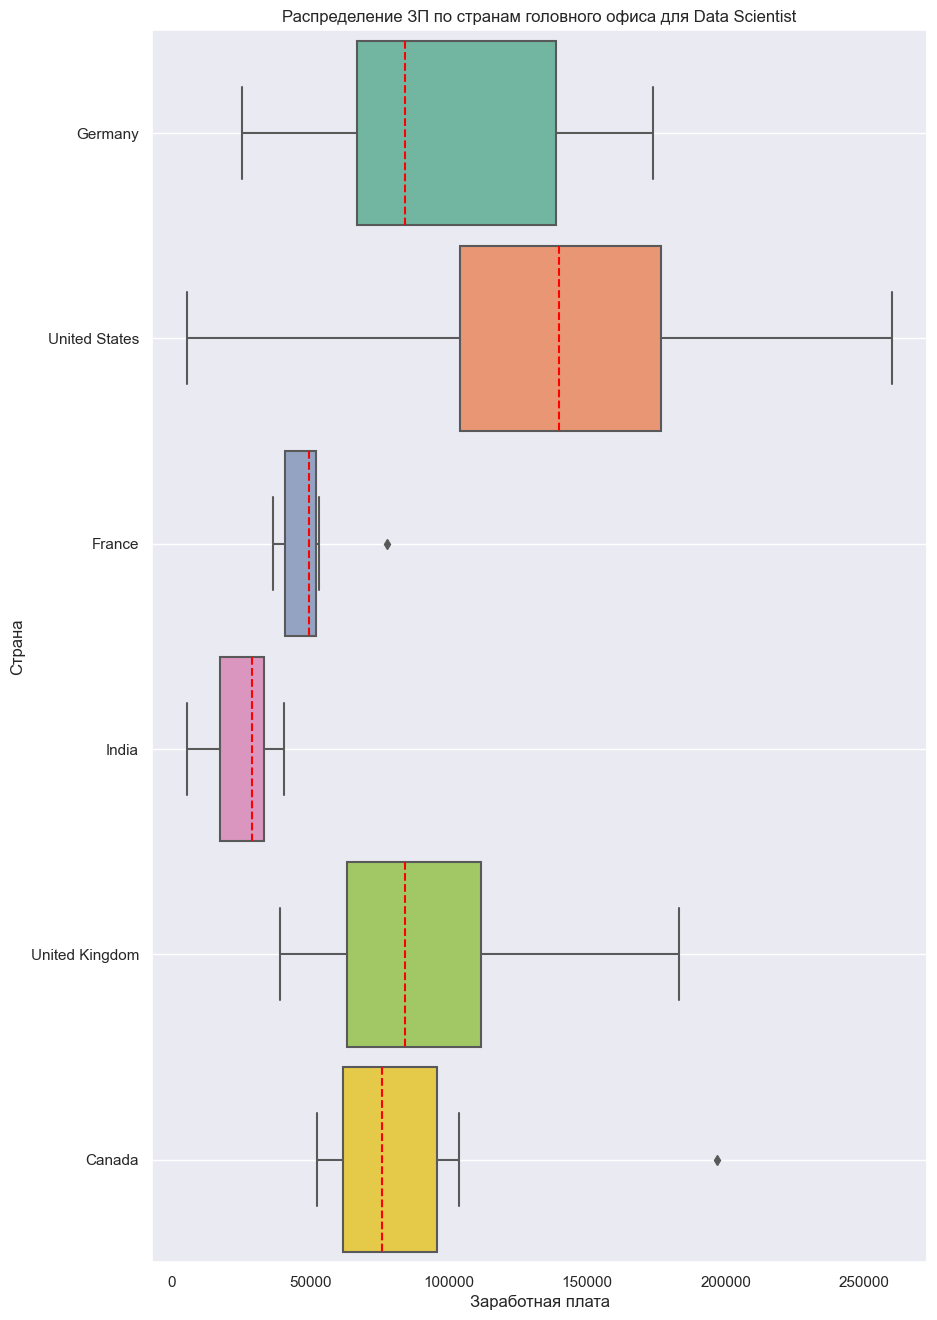

In [182]:
mask = ds_data.company_location.isin(top_countries)
top_countries_data = ds_data[mask]

# построим коробчатую диаграмму в разрезе страны и заработной платы.
fig = plt.figure(figsize=(10, 16))
boxplot = sns.boxplot(
    data=top_countries_data,
    y='company_location',
    x='salary_in_usd',
    orient='h',
    width=0.9,
    medianprops={"color": "red", "linestyle": '--'}
)
boxplot.set_title('Распределение ЗП по странам головного офиса для Data Scientist');
boxplot.set_xlabel('Заработная плата');
boxplot.set_ylabel('Страна');
boxplot.grid()

Из графика boxplot видно, что уровни ЗП по странам распределены не одинаково, основные статистики различны.  
Ввиду этого ответить на поставленный вопрос с некоторой уверенностью возможно лишь проведя статистические тесты, что мы сейчас и сделаем.


**Сформулируем гипотезы:**    
- *Нулевая гипотеза* ($H_0$): размер ЗП не зависит от расположения головного офиса: United States ($μ_1$), United Kingdom ($μ_2$), Canada ($μ_3$), Germany ($μ_4$), India ($μ_5$), France ($µ_6$)

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4 = μ_5 = µ_6$$
- *Альтернативная гипотеза* ($H_1$): размер ЗП зависит от расположения головного офиса:

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4 \neq μ_5 \neq μ_6$$  


In [183]:
# значения заработных плат
salary_us = ds_data.loc[ds_data['company_location']=='United States', 'salary_in_usd']
salary_gb = ds_data.loc[ds_data['company_location']=='United Kingdom', 'salary_in_usd']
salary_ca = ds_data.loc[ds_data['company_location']=='Canada', 'salary_in_usd']
salary_de = ds_data.loc[ds_data['company_location']=='Germany', 'salary_in_usd']
salary_in = ds_data.loc[ds_data['company_location']=='India', 'salary_in_usd']
salary_fr = ds_data.loc[ds_data['company_location']=='France', 'salary_in_usd']

# проверим на нормальность распределения с помощью теста Шапиро-Уилка
shapiro_distribution_tests([[salary_us, 'United States'], 
                            [salary_gb, 'United Kingdom'], 
                            [salary_ca, 'Canada'],
                            [salary_de, 'Germany'],
                            [salary_in, 'India'],
                            [salary_fr, 'France']])

United States:
p-value = 0.596
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

United Kingdom:
p-value = 0.335
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

Canada:
p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
__________________ 

Germany:
p-value = 0.369
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

India:
p-value = 0.435
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

France:
p-value = 0.128
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 



**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:  
- Какой тип у признака `salary_in_usd`? — Количественный.
- Сколько сравниваемых групп? — Шесть.
- Группы зависимы? — Нет.
- Признак распределён по нормальному закону? — Нет, так как не все выборки распределены нормально.

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [184]:
_, p = stats.kruskal(salary_us, salary_gb, salary_ca, salary_de, salary_in, salary_fr)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


В целом результат полностью совпадает с проводимым ранее тестом в вопросе №3. Страна в которой находится головной офис компании влияет на уровень ЗП. 

**4.4.7 признак company_size**  
Влияет ли размер компании на уровень заработной платы?

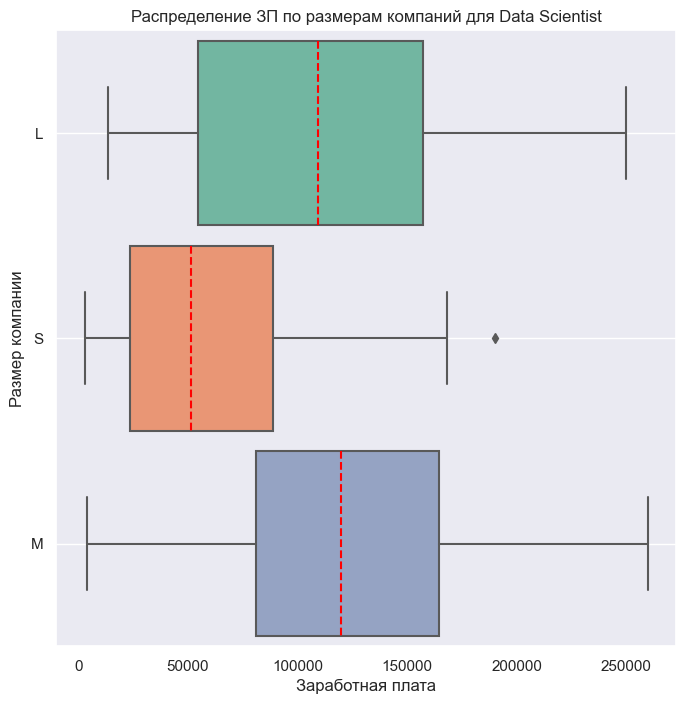

In [189]:
# построим коробчатую диаграмму в разрезе размера компании и заработной платы.
fig = plt.figure(figsize=(8, 8))
boxplot = sns.boxplot(
    data=ds_data,
    y='company_size',
    x='salary_in_usd',
    orient='h',
    width=0.9,
    medianprops={"color": "red", "linestyle": '--'}
)
boxplot.set_title('Распределение ЗП по размерам компаний для Data Scientist');
boxplot.set_xlabel('Заработная плата');
boxplot.set_ylabel('Размер компании');
boxplot.grid()

На первый взгляд размер компании влияет на уровень ЗП.  
Давайте попробуем подтвердить этот тезис статистически.

**Сформулируем гипотезы:**    
- *Нулевая гипотеза* ($H_0$): размер ЗП не зависит от размера компании:  S ($μ_1$), M ($μ_2$), L ($μ_3$)

$$ H_0 : μ_1 = μ_2 = μ_3$$
- *Альтернативная гипотеза* ($H_1$): размер ЗП зависит от размера компании:

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$ 

In [190]:
# значения заработных плат
salary_s = ds_data.loc[ds_data['company_size']=='S', 'salary_in_usd']
salary_m = ds_data.loc[ds_data['company_size']=='M', 'salary_in_usd']
salary_l = ds_data.loc[ds_data['company_size']=='L', 'salary_in_usd']

# проверим на нормальность распределения с помощью теста Шапиро-Уилка
shapiro_distribution_tests([[salary_s, 'company_size: S'], 
                            [salary_m, 'company_size: M'], 
                            [salary_l, 'company_size: L']])


company_size: S:
p-value = 0.019
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
__________________ 

company_size: M:
p-value = 0.807
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
__________________ 

company_size: L:
p-value = 0.011
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
__________________ 



**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:  
- Какой тип у признака `salary_in_usd`? — Количественный.
- Сколько сравниваемых групп? — 3.
- Группы зависимы? — Нет.
- Признак распределён по нормальному закону? — Нет, так как не все выборки распределены нормально.

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [192]:
_, p = stats.kruskal(salary_s, salary_m, salary_l)
decision_hypothesis(p)


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Таким образом размер компании влияет на размер ЗП.

## Ответы на поставленные вопросы
[❎ **К ОГЛАВЛЕНИЮ**](#ОГЛАВЛЕНИЕ)

1. Какие факторы влияют на зарплату специалиста Data Scientist?

    На ЗП специалиста Data Scientist влияют следующие факторы:  
    - work_year - Год, в котором была выплачена зарплата
    - experience_level - Опыт работы на этой должности в течение года
    - employment_type - Тип трудоустройства для этой роли
    - employee_residence - Основная страна проживания сотрудника
    - remote_ratio - Объём работы, выполняемой удалённо.
    - company_location - Страна главного офиса работодателя или филиала
    - company_size - Среднее количество людей, работавших в компании

 
2. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

   Да, наблюдается ежегодный рост заработных плат. 


3. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

    Мы с уверенность можем утверждать, что в 2022 году средний уровень ЗП Data Scientist не превышал таковой у Data Engineer.


4. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
 
     Мы статистически подтвердили наличия разницы в уровне заработных плат в компаниях разных размеров, а именно:
   - меньше всего получают в компаниях размера S, медиана ЗП на уровне \\$51000  
   - более чем в 2 раза платят в компаниях размера L, мениана на уровне \\$109518  
   - больше всех платят в компаниях размера M, мениана на уровне \\$120080


6. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

    Мы можем утверждать, что связи между наличием должностей Data Scientist и Data Engineer и размером компании нет, они независимы.

## Итоги
[❎ **К ОГЛАВЛЕНИЮ**](#ОГЛАВЛЕНИЕ)

Проект помог дополнительно попрактиковаться в предобработке и разведывательном анализе данных (EDA).  
В рамках данного проекта были отработаны на практике такие темы как:  
- проверка данных на нормальность распределения
- критерии выбора статистических тестов
- параметрические тесты
- непараметрические тесты
- статистические тесты для категориальных признаков



### 